In [44]:
import numpy as np
import pandas as pd
import gudhi as gd  
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
G = nx.generators.dodecahedral_graph()

C:\Users\Ramos\AppData\Local\Temp\ipykernel_21400\1100645713.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


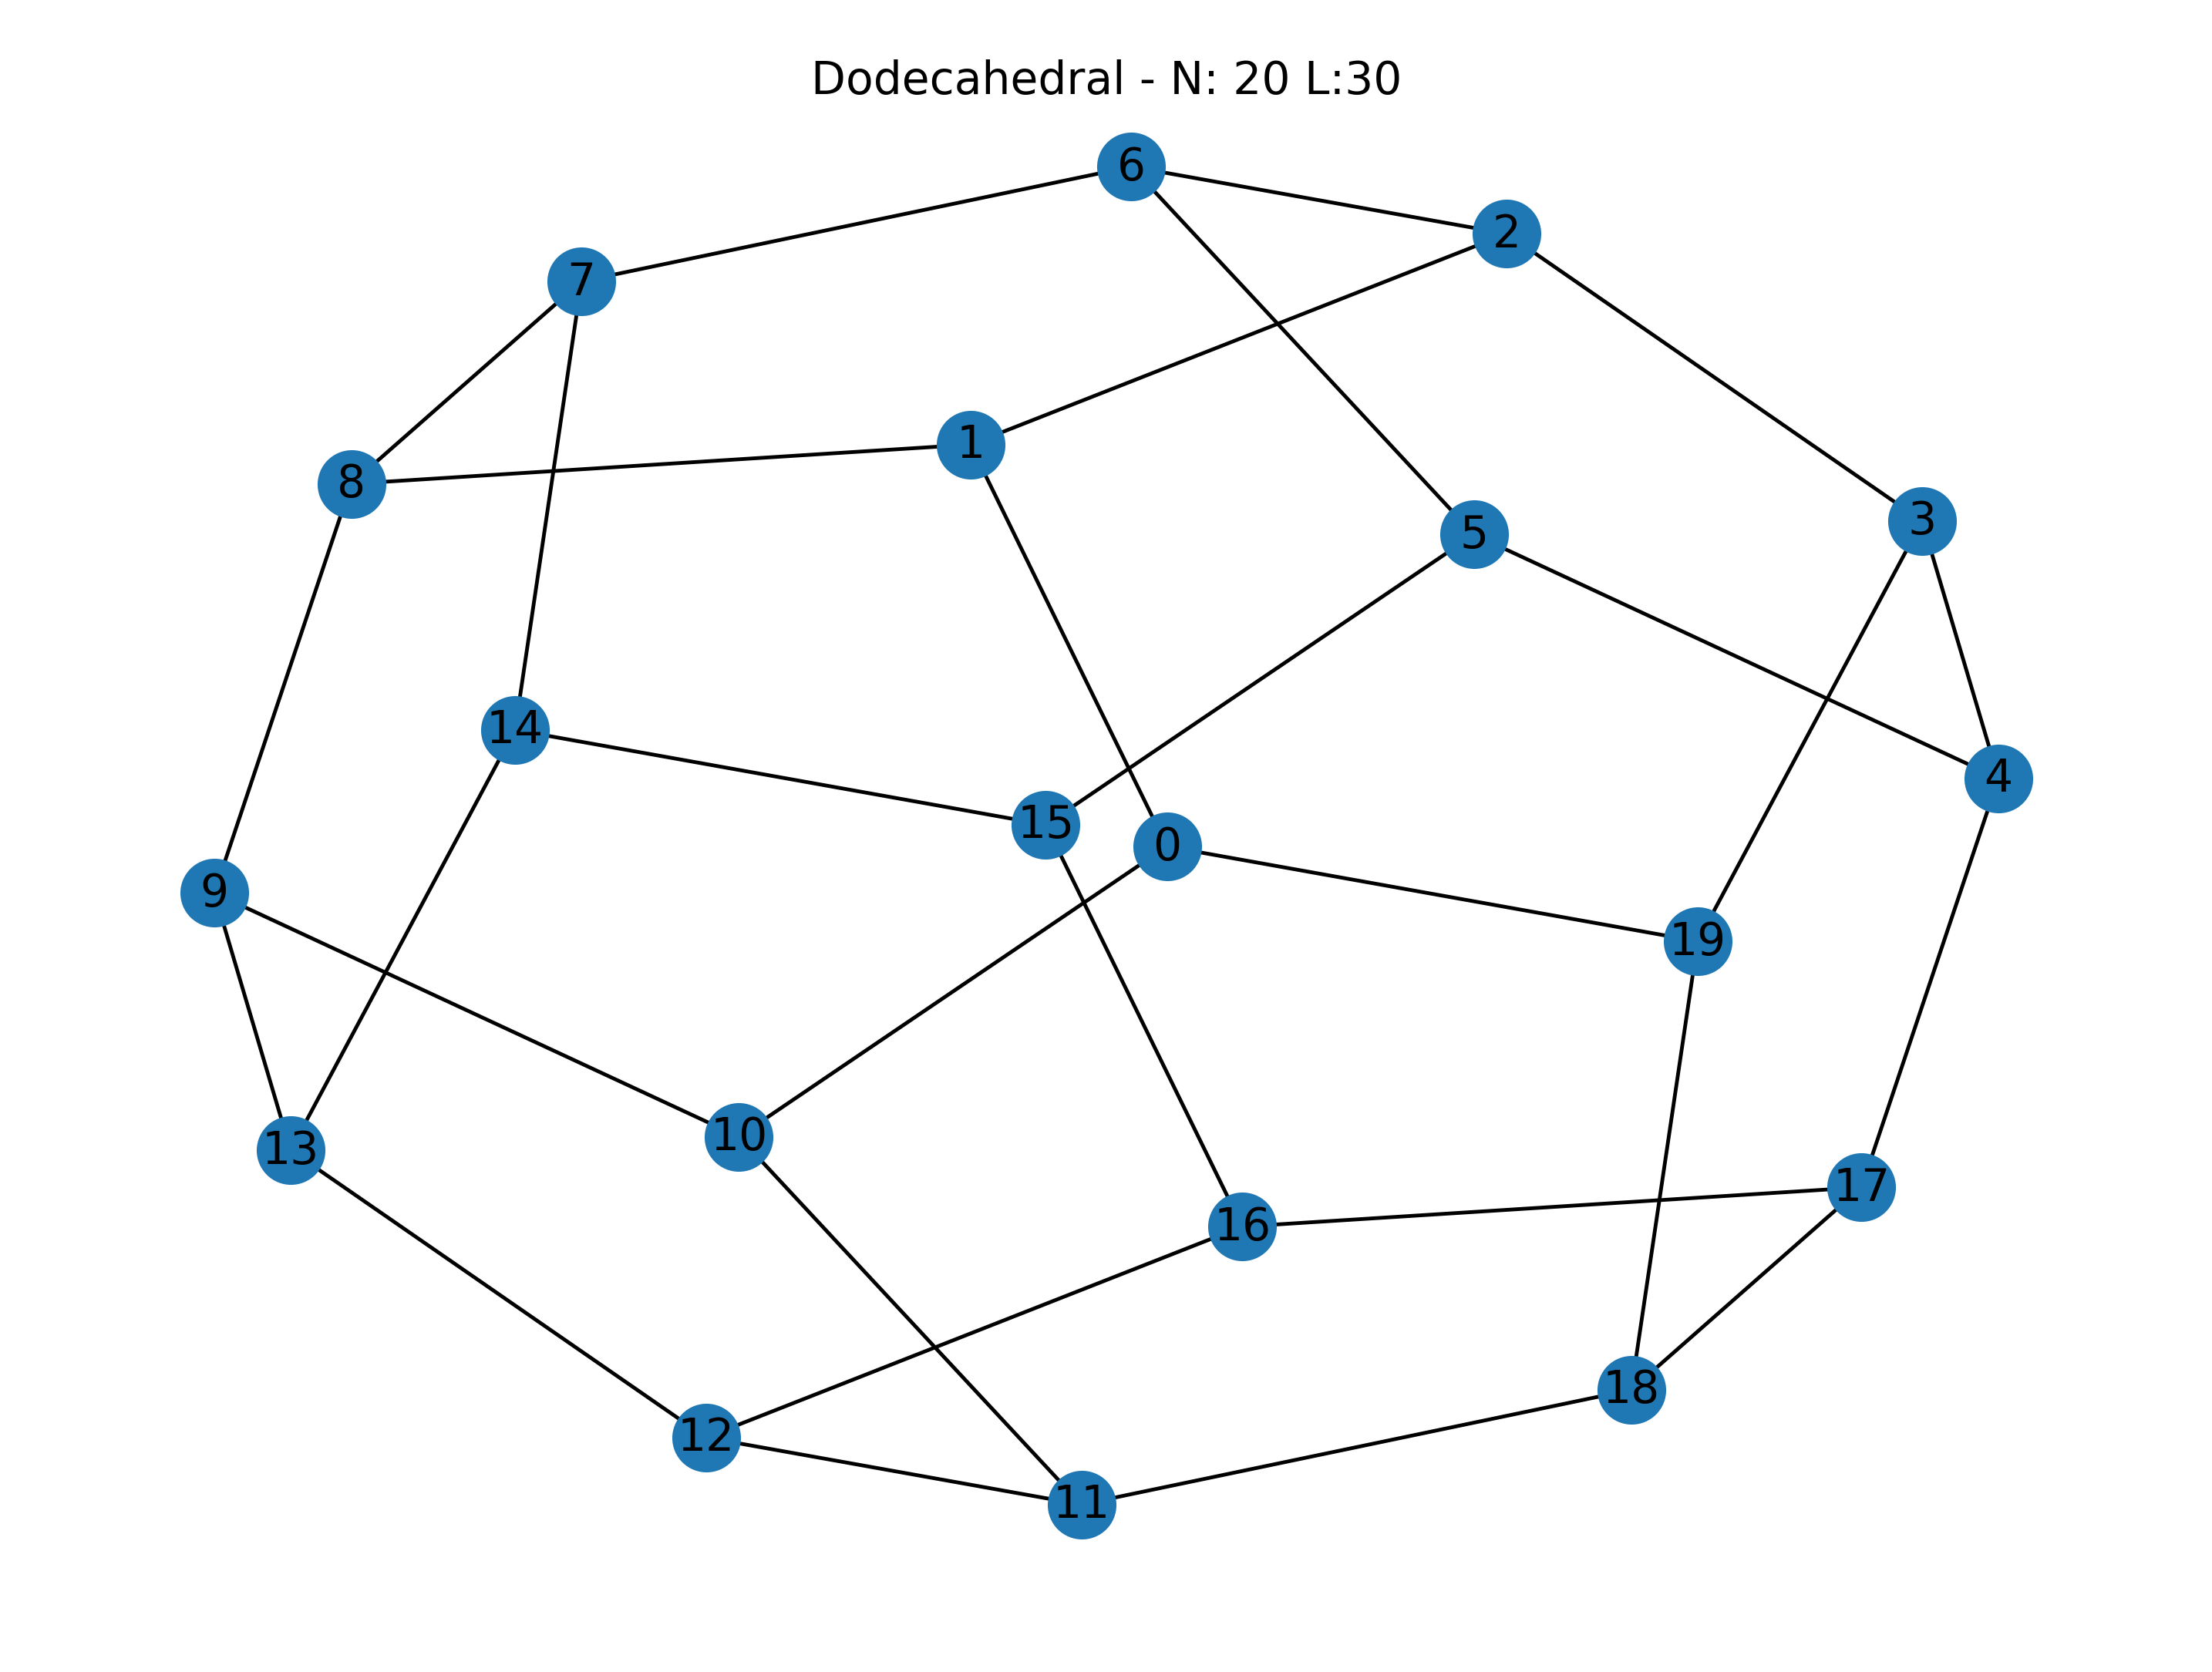

In [13]:
plt.figure(figsize=(8,6),dpi=350)
G.name='Dodecahedral'
nx.draw_kamada_kawai(G,with_labels=True)
plt.suptitle(G.name+' - N: '+str(G.number_of_nodes())+' L:'+str(G.number_of_edges()))
plt.tight_layout()
plt.savefig('./99 output/'+G.name+'.png',dpi=500,facecolor='white')
plt.show()

In [39]:
def persistantHomologyFromNetworkWithRips(G,name,dim,plot=True):      
    dm=pd.DataFrame(dict(nx.shortest_path_length(G))).sort_index()
    dm=dm[sorted(dm.columns)]
    skeleton = gd.RipsComplex(distance_matrix = dm.values) 

    Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = dim)
    
    BarCode = Rips_simplex_tree.persistence()
      
    #----Simplexes Resume
    simplexesLen={}
    for simplex,filtration in Rips_simplex_tree.get_filtration():
        if(len(simplex)-1 not in simplexesLen):
            simplexesLen[len(simplex)-1]=1
        else:
            simplexesLen[len(simplex)-1]+=1    

    simplexesResume=''
    for item in simplexesLen.items():
        simplexesResume+=str(item[0])+': '+str(item[1])+' | '
    simplexesResume[0:-3]  
    
    #----Barcode Resume
    
    dimensionsLen={}
    for dim in range(0,dim+1):
        dimensionsLen[dim]=len([bd for bd in BarCode if (bd[0]==dim)])

    dimensionResume=''
    for item in dimensionsLen.items():
        dimensionResume+=str(item[0])+': '+str(item[1])+' | '
    dimensionResume[0:-3]    
            
    #--Plot
    if plot:
        plt.figure(dpi=250)
        gd.plot_persistence_barcode(BarCode,axes=plt.gca());    
        plt.title(name+'\n Simplexes: '+simplexesResume[0:-3]+'\n Numbers of Bars: '+dimensionResume[0:-3],fontsize=9)
        plt.ylim(-0.5,32)
        plt.xlim(-0.1,3.1)
        plt.tight_layout()
        plt.savefig('./99 output/Barcode - '+name+' - Rips.png',dpi=500,facecolor='white')
        plt.show()


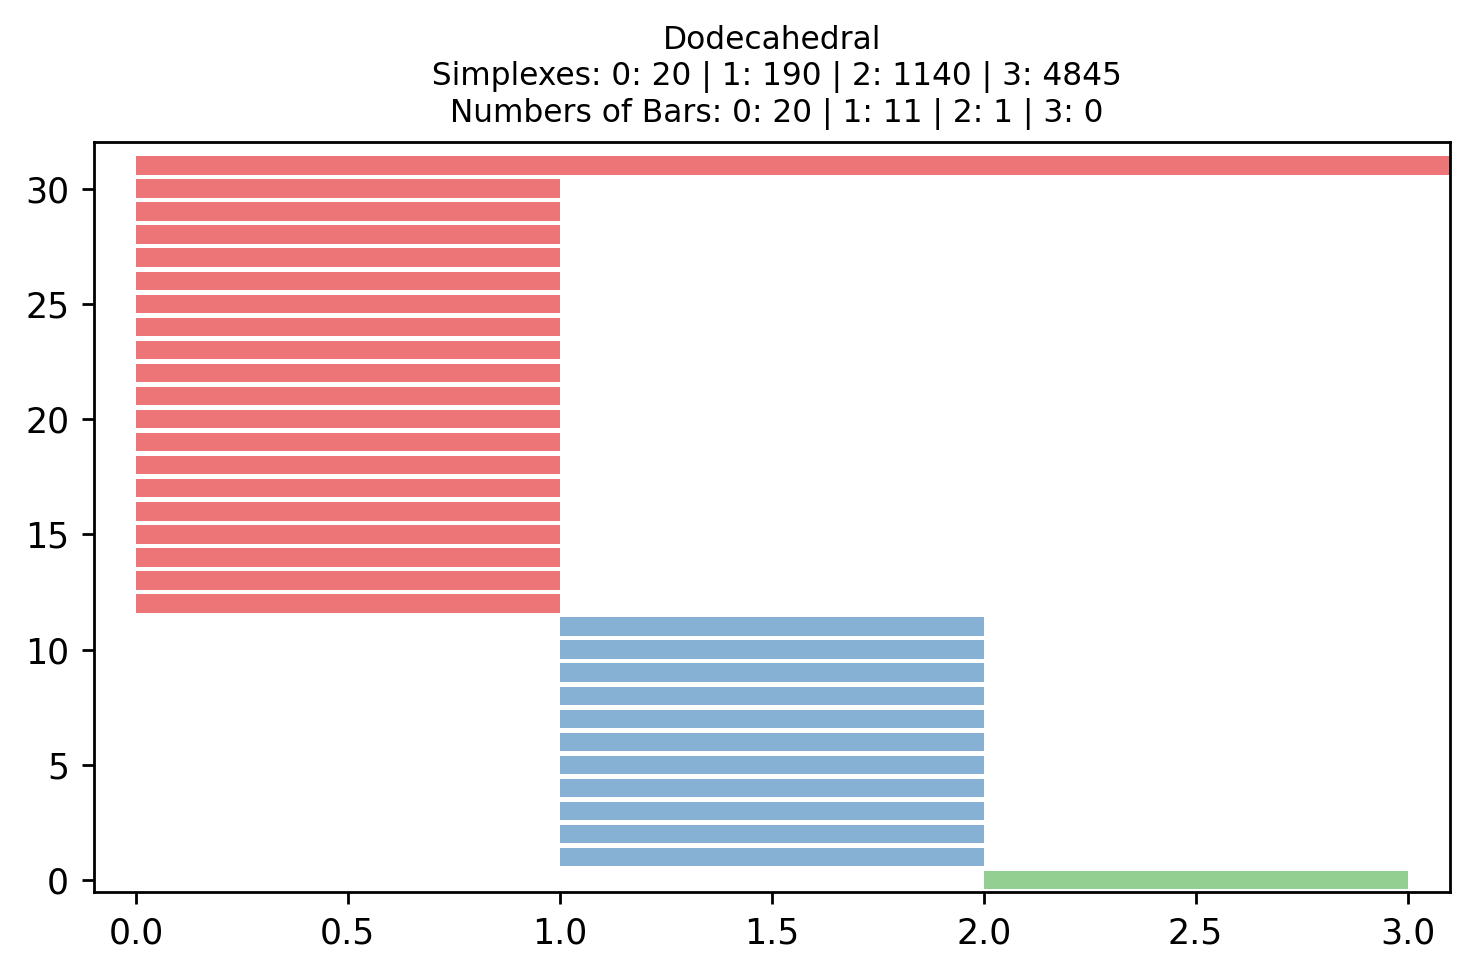

In [40]:
persistantHomologyFromNetworkWithRips(G,G.name,3)

In [52]:
dm=pd.DataFrame(dict(nx.shortest_path_length(G))).sort_index()
dm=dm[sorted(dm.columns)]
dm=dm.replace(0,np.nan)

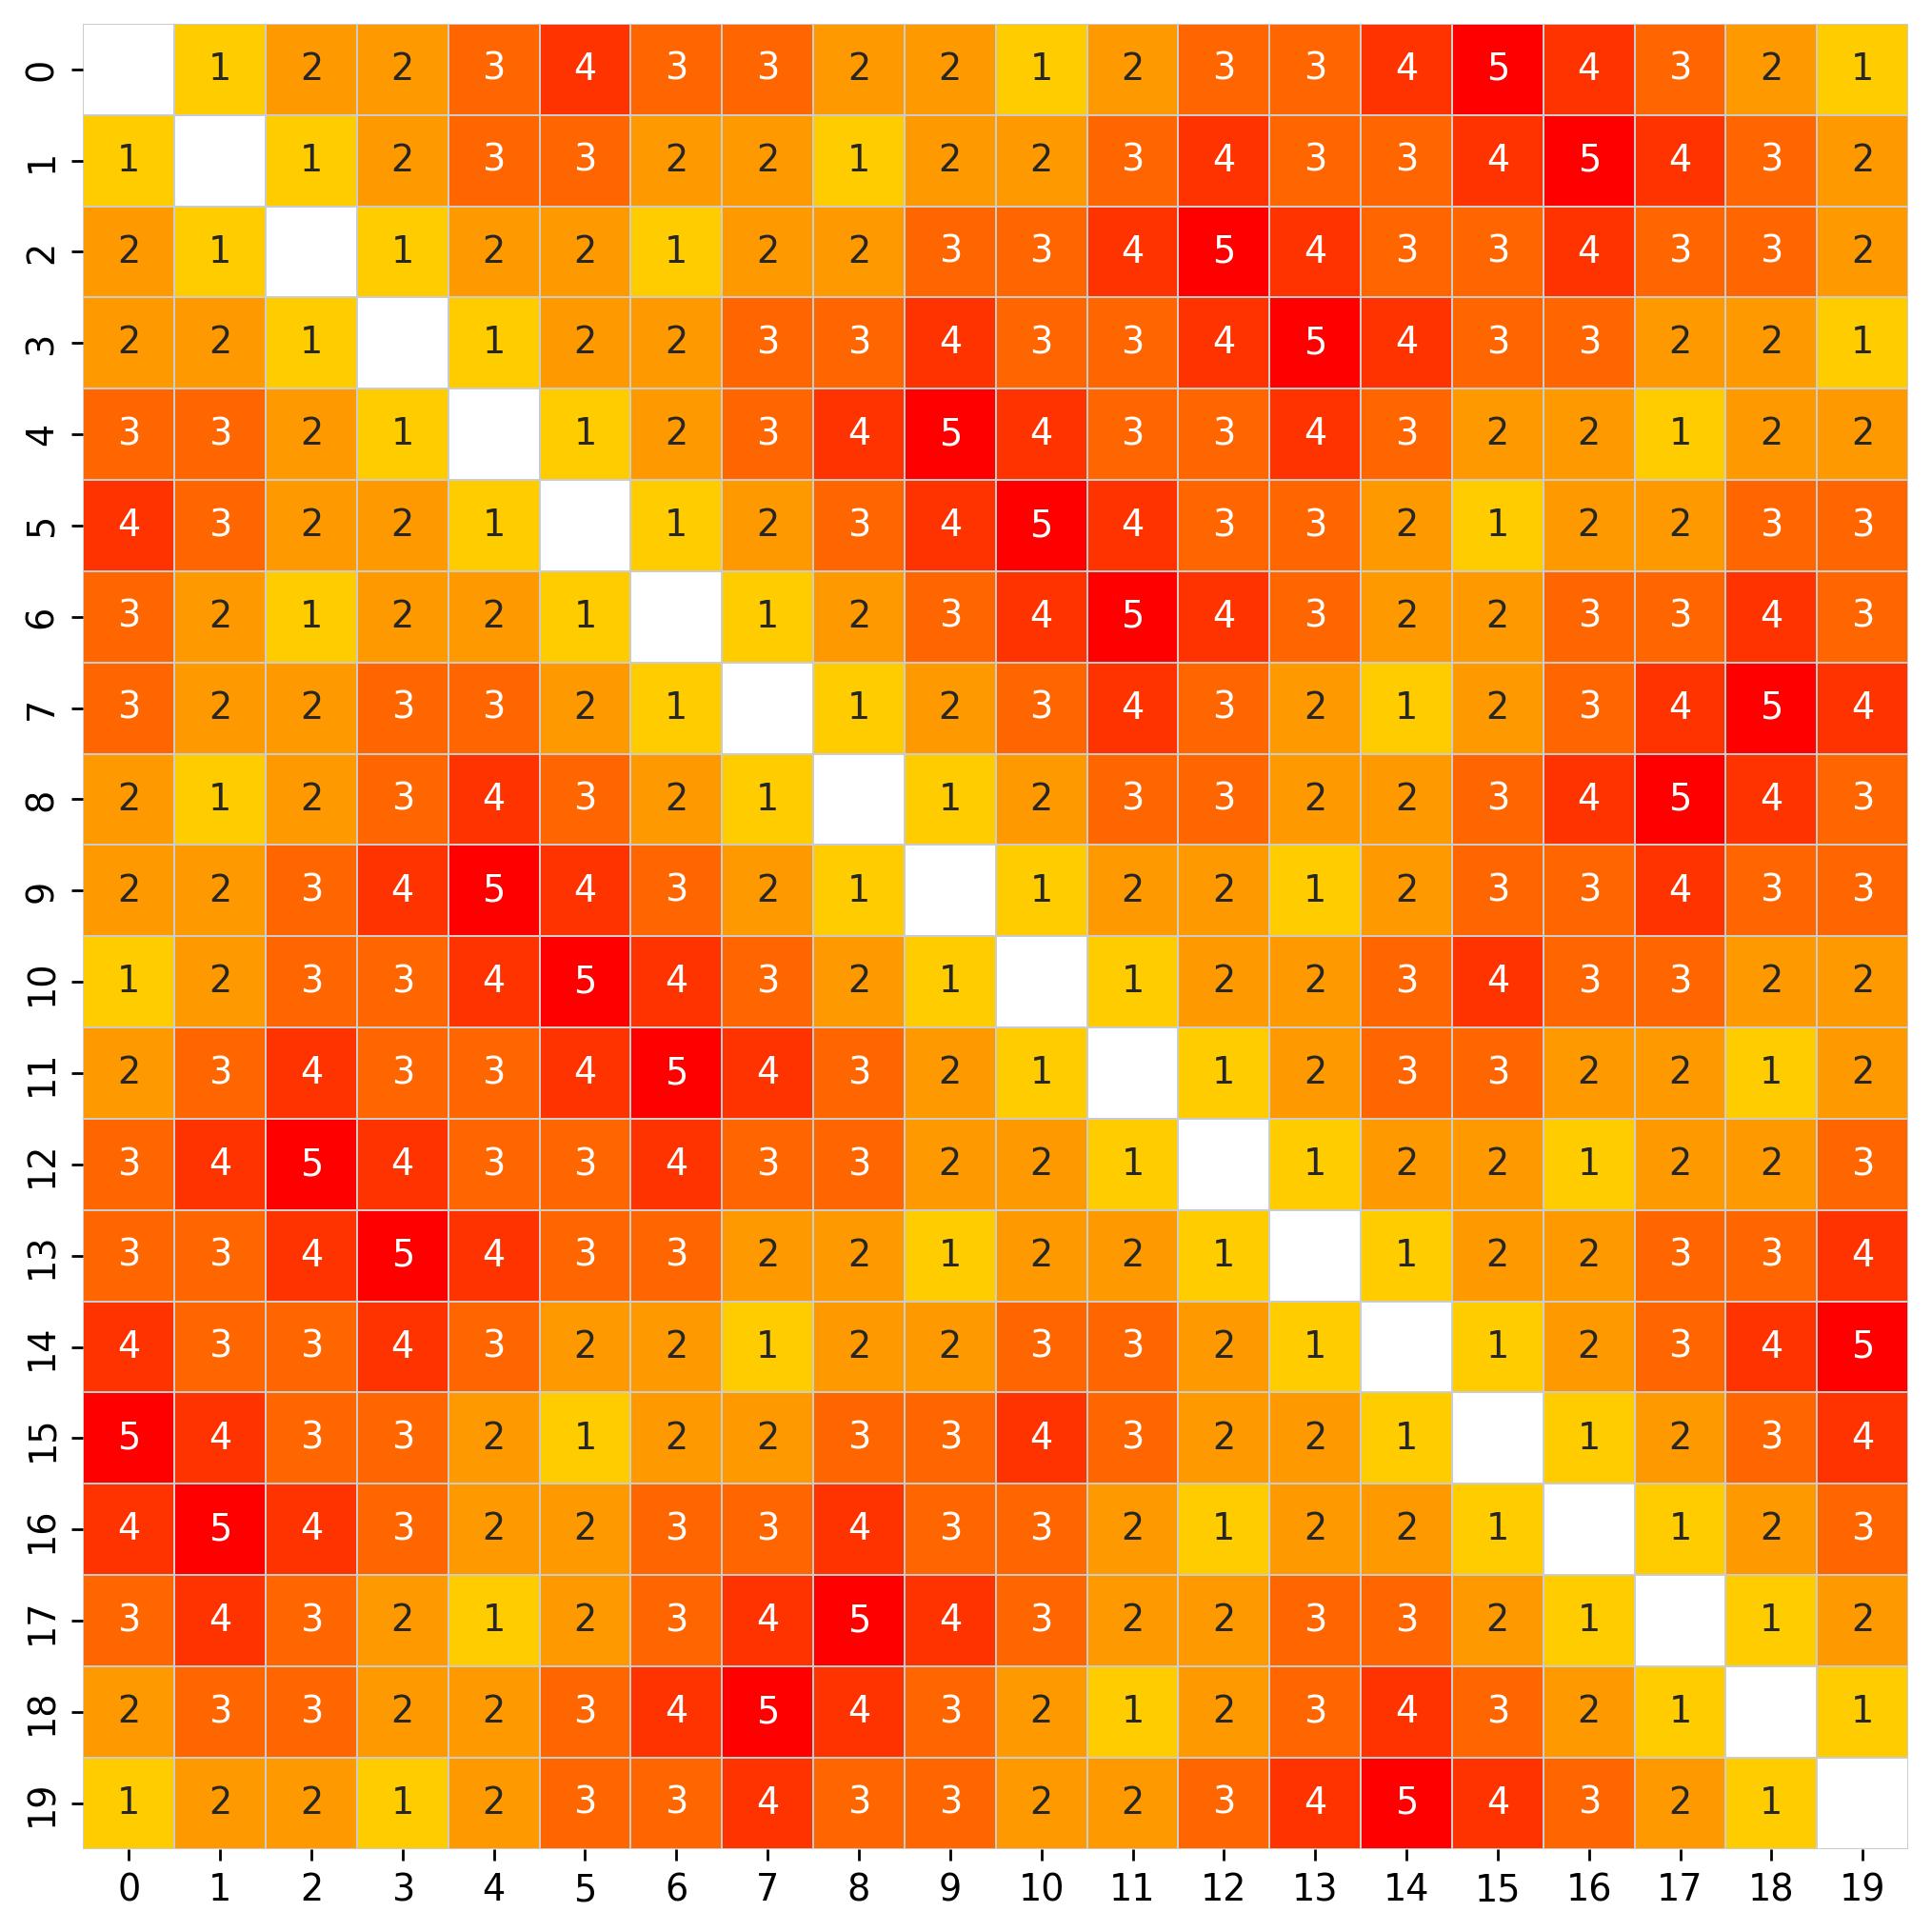

In [56]:
plt.figure(figsize=(8,8),dpi=250)
cmap = sns.color_palette("autumn_r", as_cmap=True)
sns.heatmap(dm,annot=True, fmt=".0f", 
           linewidths=0.5, linecolor='#ccc',cmap=cmap, vmin=0, vmax=5, 
           cbar=False, square=True,annot_kws={"size": 11},)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.tight_layout(pad=0.3)
plt.savefig("99 output/distance matrix.png", format='png', dpi=550,facecolor="white")
plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,1.0,2.0,2.0,3.0,4.0,3.0,3.0,2.0,2.0,1.0,2.0,3.0,3.0,4.0,5.0,4.0,3.0,2.0,1.0
1,1.0,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,4.0,3.0,2.0
2,2.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0
3,2.0,2.0,1.0,NaN,1.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,1.0
4,3.0,3.0,2.0,1.0,NaN,1.0,2.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,2.0
5,4.0,3.0,2.0,2.0,1.0,NaN,1.0,2.0,3.0,4.0,5.0,4.0,3.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0
6,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1.0,2.0,3.0,4.0,5.0,4.0,3.0,2.0,2.0,3.0,3.0,4.0,3.0
7,3.0,2.0,2.0,3.0,3.0,2.0,1.0,NaN,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,4.0
8,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,NaN,1.0,2.0,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,3.0
9,2.0,2.0,3.0,4.0,5.0,4.0,3.0,2.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,3.0,3.0,4.0,3.0,3.0
